In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from pandas_datareader._utils import RemoteDataError
import yfinance as yfin
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle

yfin.pdr_override()

In [3]:
series_ticker = pd.read_csv('./list_stocks_nse.csv')
# series_ticker = pd.read_csv('./ind_nifty50list.csv')
# series_ticker = series_ticker[series_ticker["Country"] == 'India']
# series_ticker = series_ticker.drop(['Unnamed: 5', 'Unnamed: 6'], axis=1)
series_ticker.head()

,Symbol,Company Name
0,RELIANCE,Reliance Industries Limited
1,TCS,Tata Consultancy Services Limited
2,HDFCBANK,HDFC Bank Limited
3,ICICIBANK,ICICI Bank Limited
4,BHARTIARTL,Bharti Airtel Limited


In [4]:
series_ticker = series_ticker[:200]

In [5]:
series_ticker['Symbol'] = series_ticker['Symbol'].astype(str) + '.NS'
series_ticker.head()

,Symbol,Company Name
0,RELIANCE.NS,Reliance Industries Limited
1,TCS.NS,Tata Consultancy Services Limited
2,HDFCBANK.NS,HDFC Bank Limited
3,ICICIBANK.NS,ICICI Bank Limited
4,BHARTIARTL.NS,Bharti Airtel Limited


In [6]:
ticker_data = series_ticker[['Symbol', 'Company Name']].reset_index(drop=True)
ticker_data.head()

,Symbol,Company Name
0,RELIANCE.NS,Reliance Industries Limited
1,TCS.NS,Tata Consultancy Services Limited
2,HDFCBANK.NS,HDFC Bank Limited
3,ICICIBANK.NS,ICICI Bank Limited
4,BHARTIARTL.NS,Bharti Airtel Limited


In [7]:
ticker_data.set_index('Symbol', inplace=True)
ticker_data.index = [d for d in ticker_data.index]
ticker_data.head()

,Company Name
RELIANCE.NS,Reliance Industries Limited
TCS.NS,Tata Consultancy Services Limited
HDFCBANK.NS,HDFC Bank Limited
ICICIBANK.NS,ICICI Bank Limited
BHARTIARTL.NS,Bharti Airtel Limited


In [8]:
ticker_data.to_pickle('ticker_data.p')

In [8]:
series_ticker = pickle.load(open('ticker_data.p', 'rb'))
series_ticker.head()

,Company Name
RELIANCE.NS,Reliance Industries Limited
TCS.NS,Tata Consultancy Services Limited
HDFCBANK.NS,HDFC Bank Limited
ICICIBANK.NS,ICICI Bank Limited
BHARTIARTL.NS,Bharti Airtel Limited


In [8]:
def plot_stock_trends_and_returns(prices, title, returns, avg_returns, std_devation_returns):
    
    # Plot stock price trend
    plt.figure(figsize=(10,6))
    plt.plot(prices)
    plt.title(title, fontsize=16)
    subtitle = 'Avg returns: ' + str(avg_returns) + '   Std Deviation: ' + str(std_devation_returns)
    plt.suptitle(subtitle, fontsize=10)
    plt.ylabel(f'prices ($) {title}', fontsize=14)
    
    # Plot percent_return trend
    plt.figure(figsize=(10,6))
    plt.plot(returns[0], returns[1], color='g')
    plt.title(f'Percent returns on {title}')
    plt.axhline(0, color='k', linestyle='--')
    
    plt.tight_layout()
    plt.show()

In [9]:
def perform_calculations(ticker, start_date, end_date, time_period):
    pct_return_after_period = []
    buy_dates = []
    try:
        prices = pdr.get_data_yahoo(ticker, start=start_date, end=end_date).Close
        prices.index = [d.date() for d in prices.index]
    except (RemoteDataError, KeyError):
        return None, -np.inf, np.inf, None
    
    

    for buy_date, buy_price in prices.items():
        sell_date = buy_date + timedelta(weeks=time_period)
        try:
            sell_price = prices[prices.index == sell_date].iloc[0]
        except IndexError:
            continue 
        
        # Compute returns 
        pct_return = (sell_price - buy_price) / buy_price * 100
        pct_return_after_period.append(pct_return)
        buy_dates.append(buy_date)
    
    return prices, np.mean(pct_return_after_period), np.std(pct_return_after_period), [buy_dates, pct_return_after_period]


In [10]:
# Set parameters
end_date =  datetime.now().date()
start_date = end_date - timedelta(days=300)

time_period = 4 # week
target_returns = 3
acceptable_deviation = 7

In [14]:
series_ticker.iloc[0].values[0]

'Reliance Industries Limited'

In [15]:
stock_list = []
ticker_list = []
for i in range(len(series_ticker)):
    ticker = series_ticker.index[i]
    name = series_ticker.iloc[i].values[0]
    prices, avg_returns, std_devation_returns, returns = perform_calculations(ticker, start_date, end_date, time_period)
    if avg_returns >= target_returns and std_devation_returns <= acceptable_deviation:
        # plot_stock_trends_and_returns(prices, name, returns)
        ticker_list.append(ticker)
        stock_list.append([prices, name, returns, avg_returns, std_devation_returns])
    else:
        continue

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [41]:
len(stock_list)

45

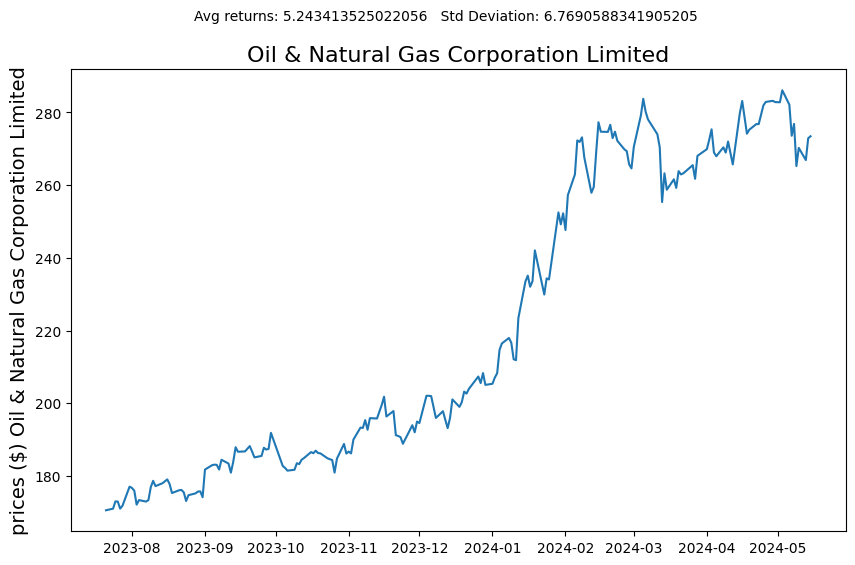

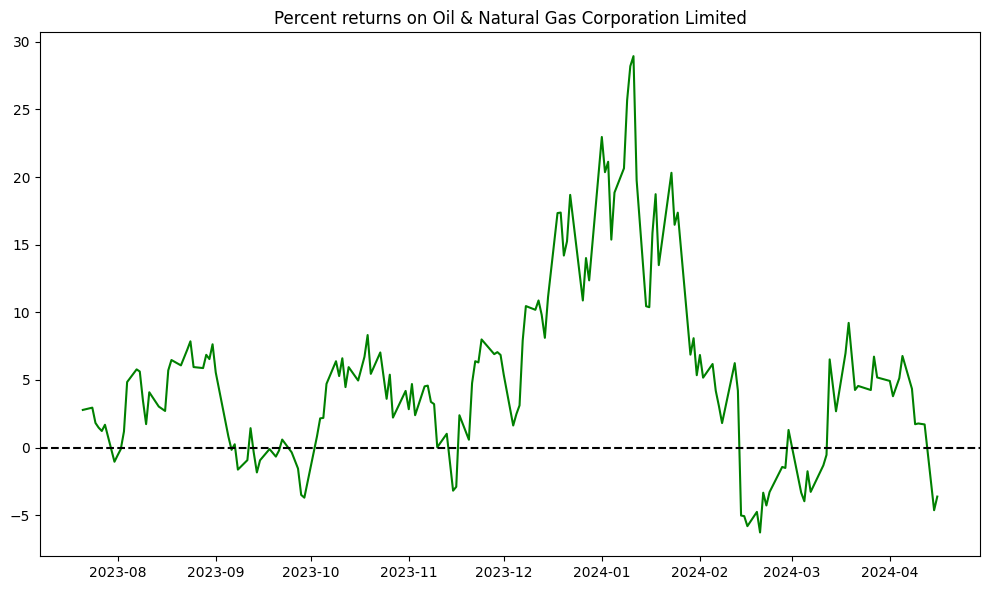

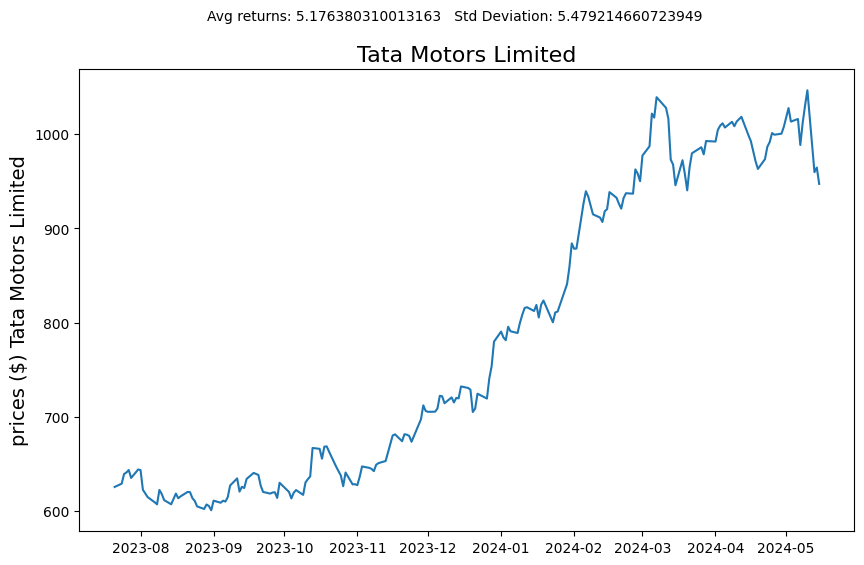

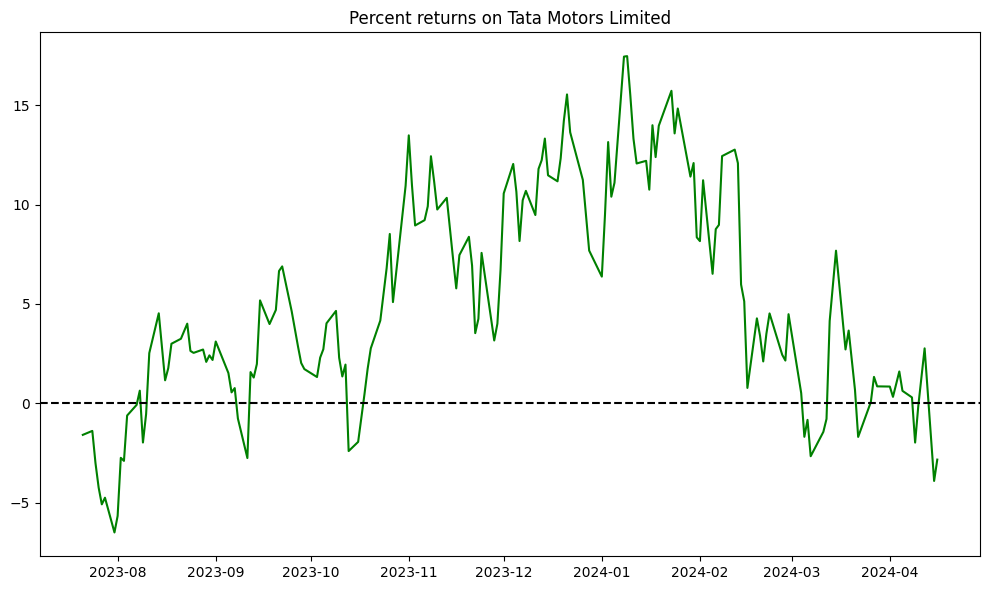

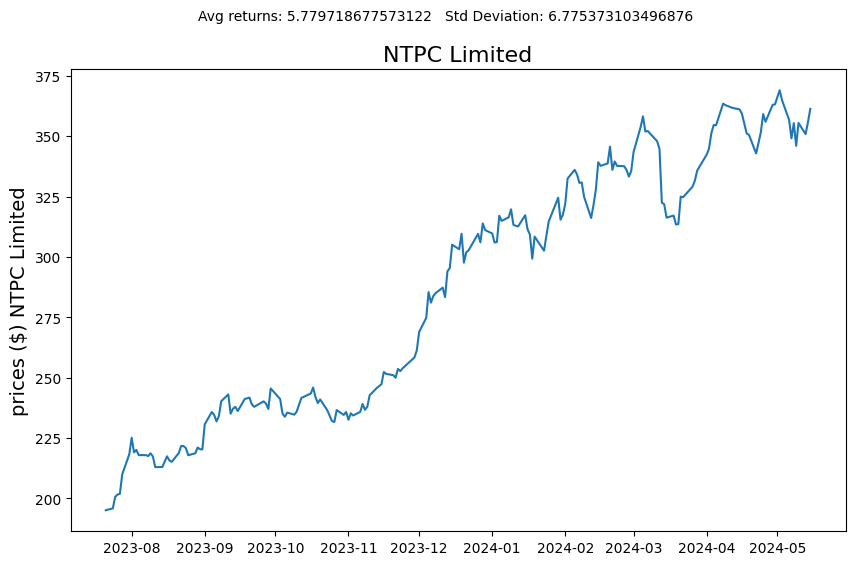

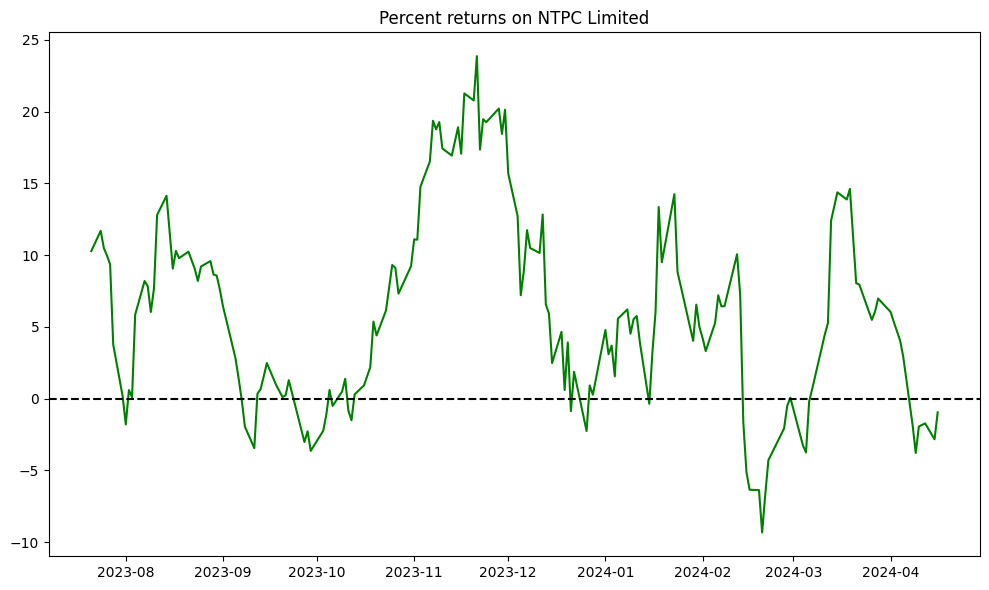

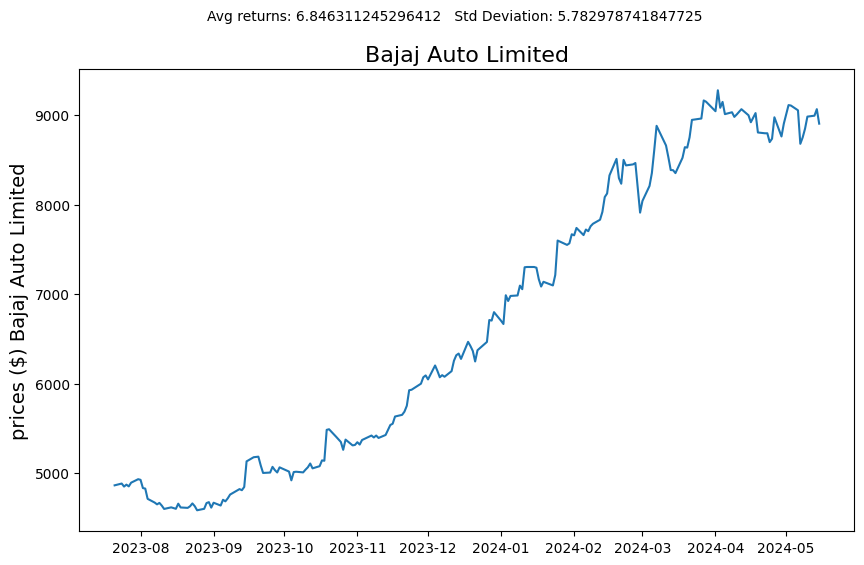

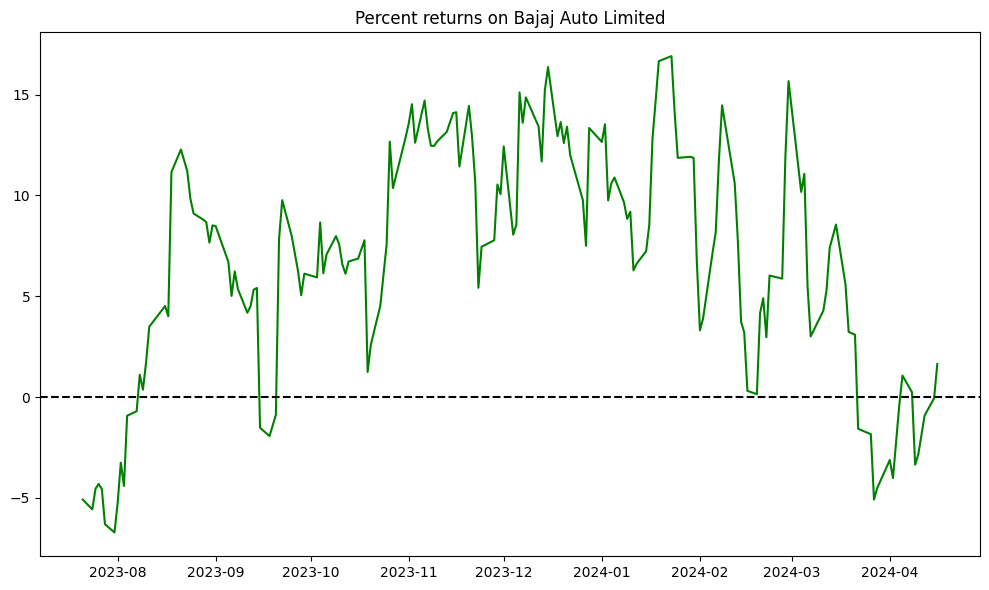

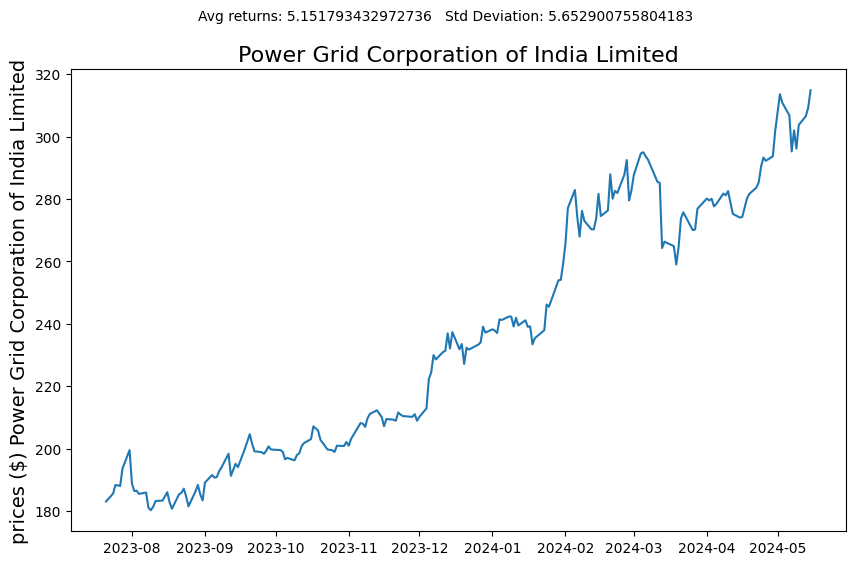

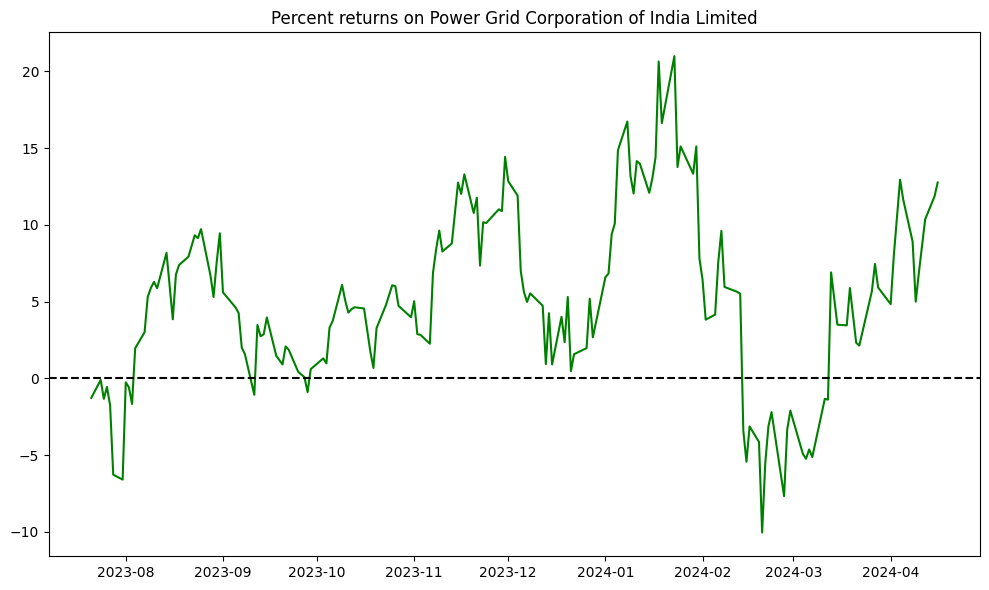

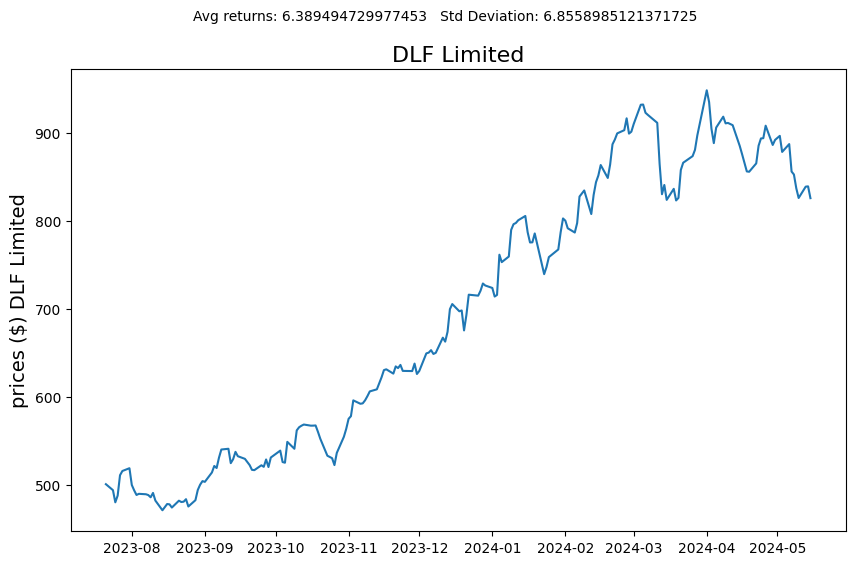

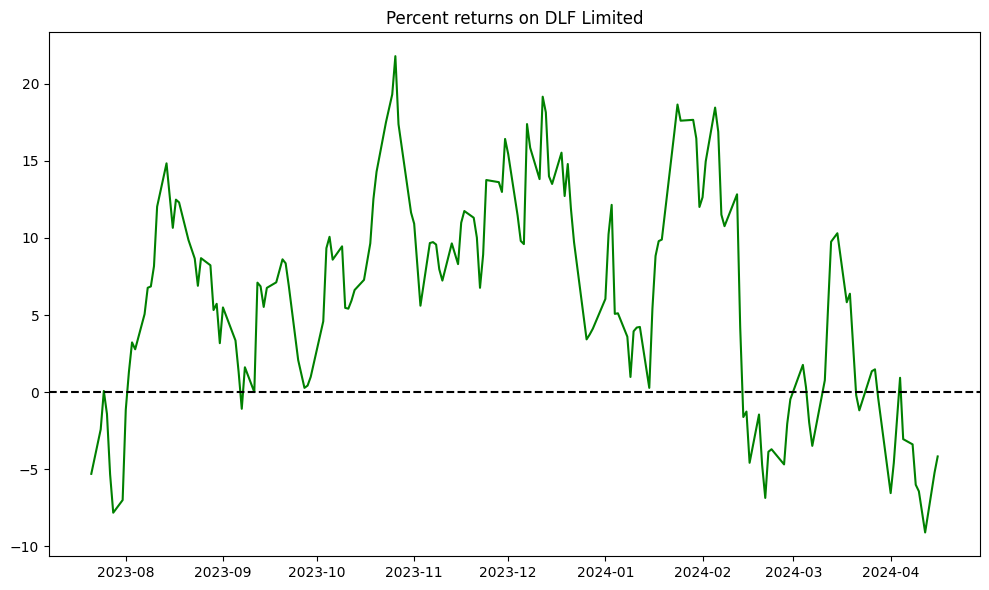

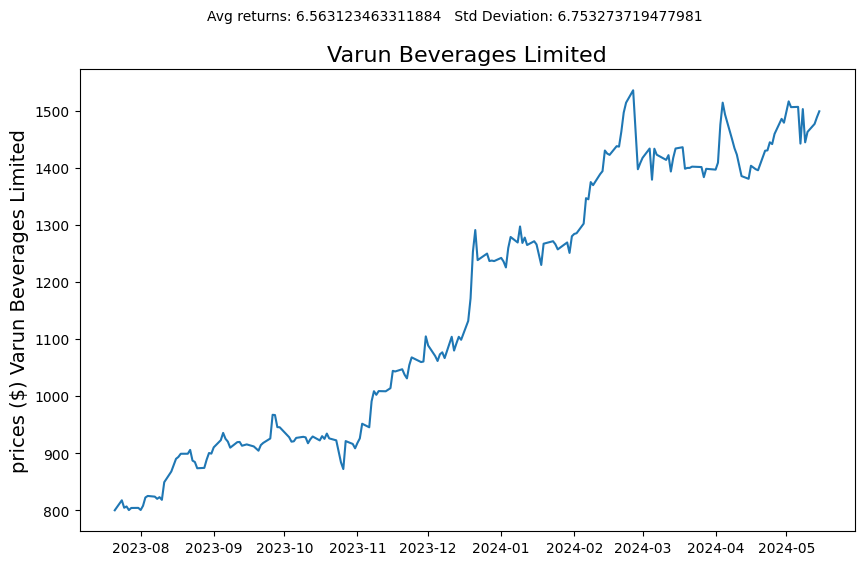

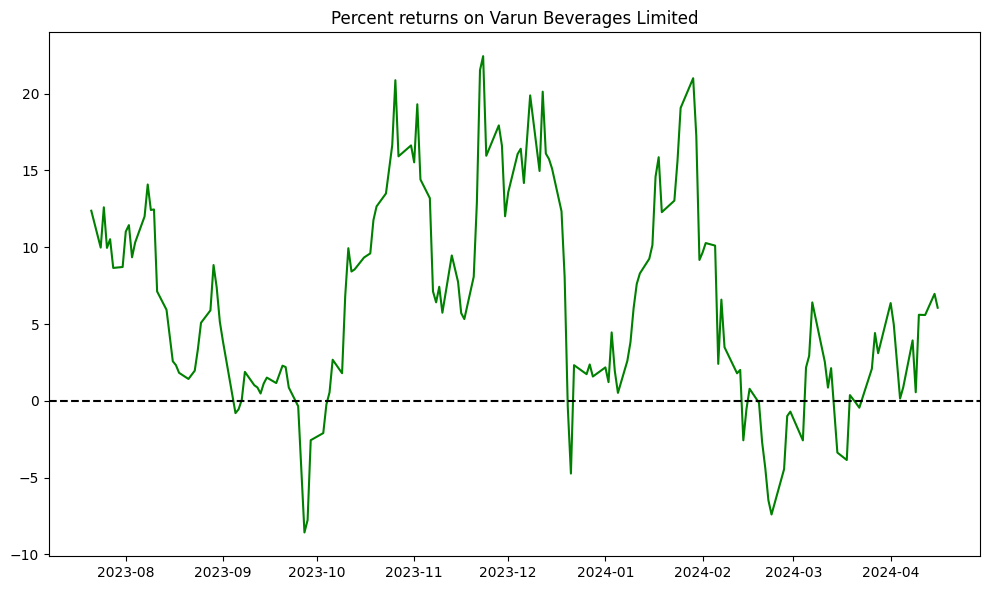

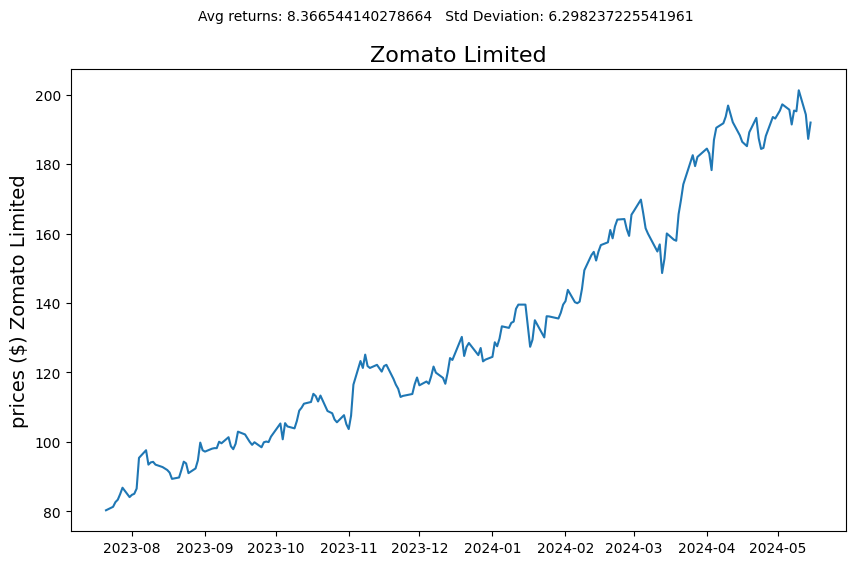

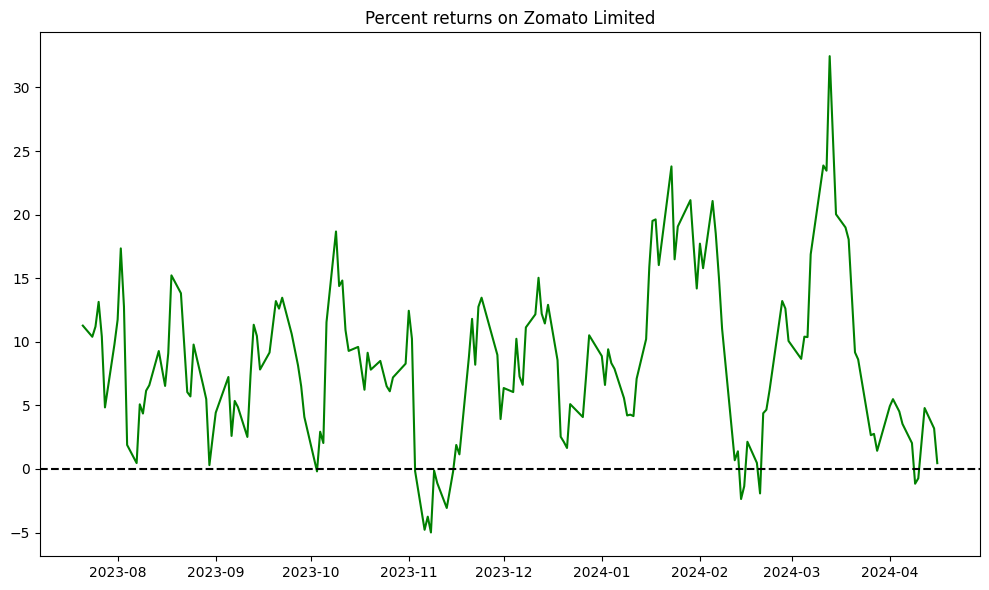

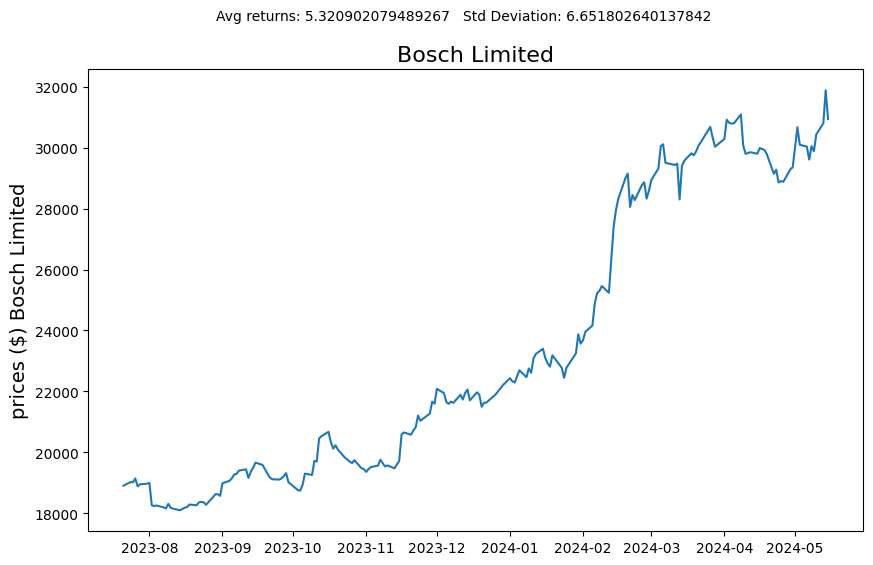

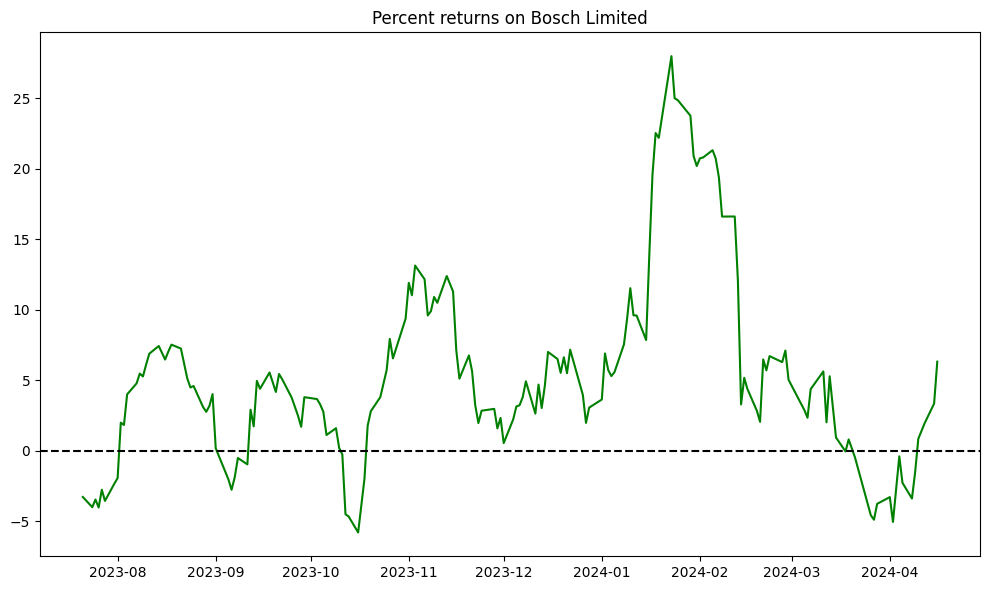

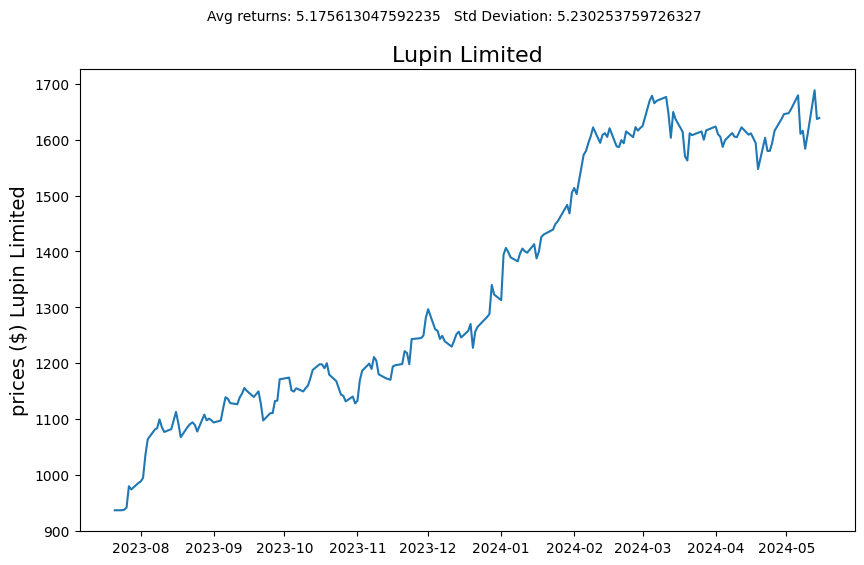

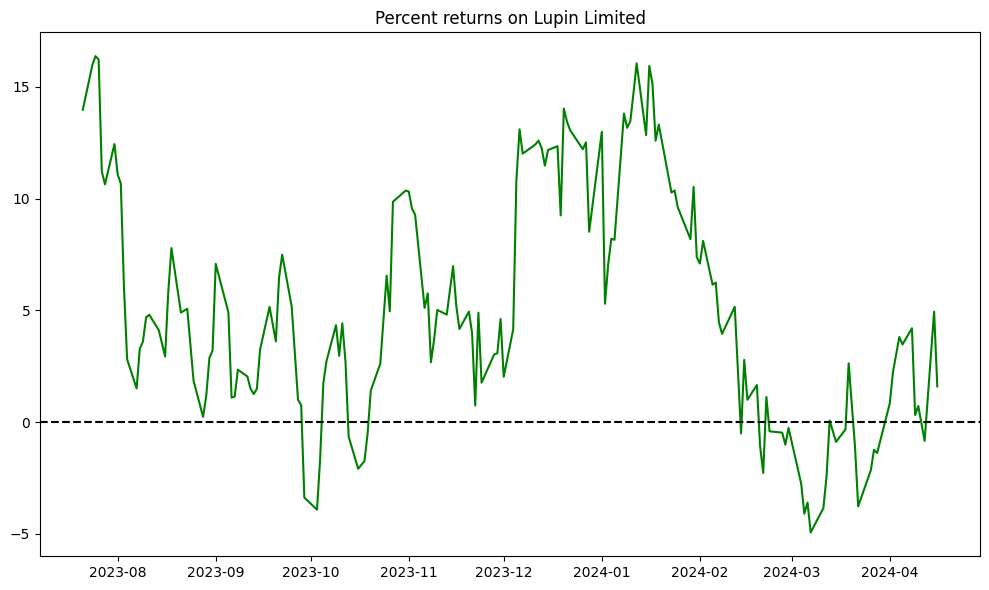

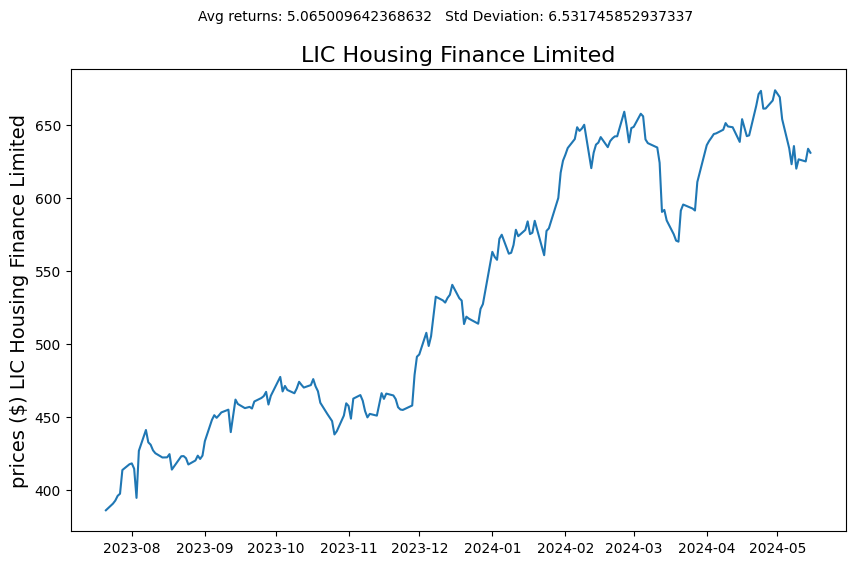

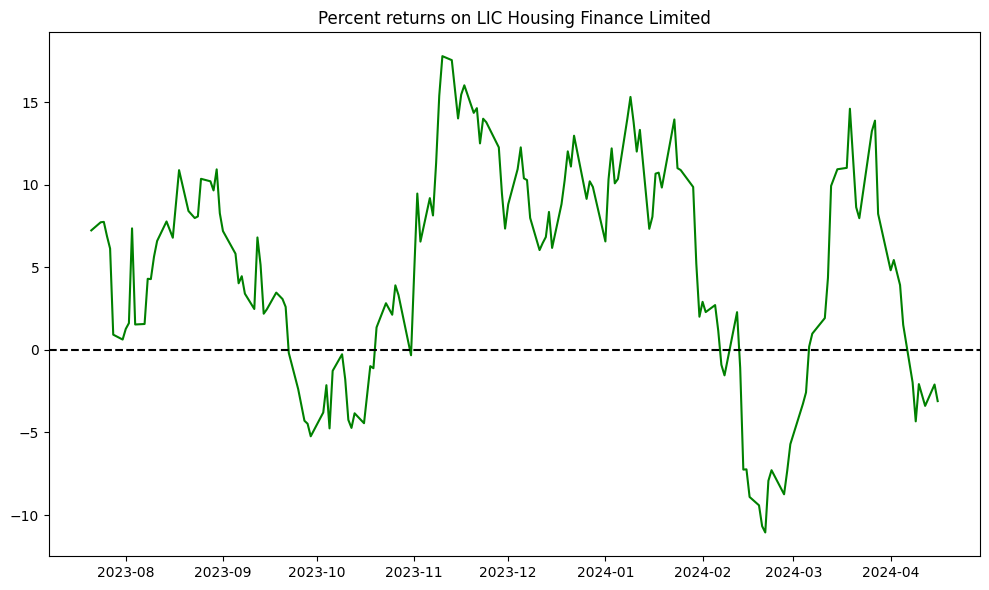

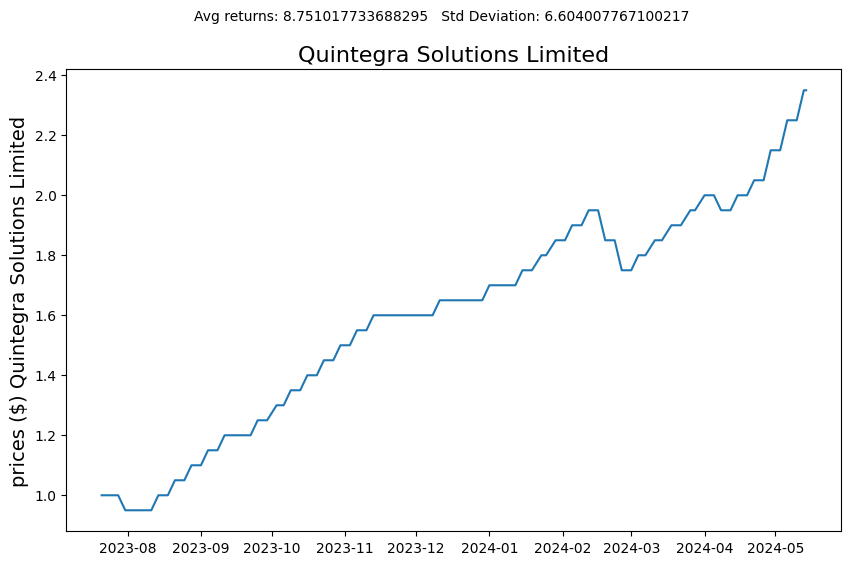

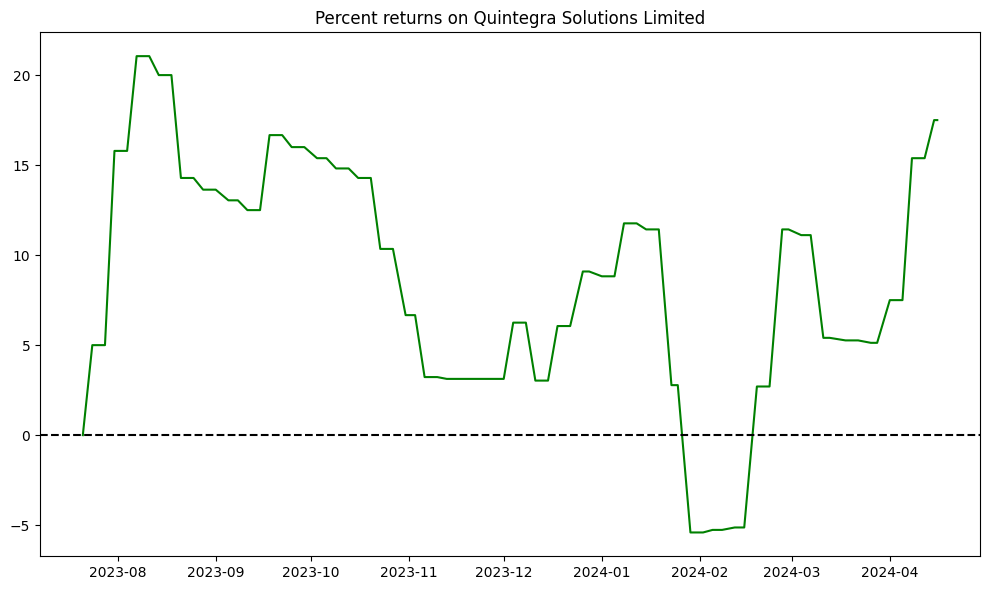

In [38]:
for stock in stock_list:
    plot_stock_trends_and_returns(stock[0], stock[1], stock[2], stock[3], stock[4])